In [4]:
import numpy as np
import pandas as pd
from ase.io.xyz import read_xyz
from ase.io import read
from io import StringIO
from sklearn.metrics import roc_auc_score
import os
import schnetpack as spk
from torch.optim import Adam
import matplotlib.pyplot as plt
import schnetpack.train as trn
from schnetpack import AtomsData
import torch

FreeSolv

In [3]:
freesolv_file = 'data/freesolv.csv'
freesolv_data = pd.read_csv(freesolv_file)
freesolv_data

,iupac,smiles,expt,calc
0,"4-methoxy-N,N-dimethyl-benzamide",CN(C)C(=O)c1ccc(cc1)OC,-11.01,-9.625
1,methanesulfonyl chloride,CS(=O)(=O)Cl,-4.87,-6.219
2,3-methylbut-1-ene,CC(C)C=C,1.83,2.452
3,2-ethylpyrazine,CCc1cnccn1,-5.45,-5.809
4,heptan-1-ol,CCCCCCCO,-4.21,-2.917
...,...,...,...,...
637,methyl octanoate,CCCCCCCC(=O)OC,-2.04,-3.035
638,pyrrolidine,C1CCNC1,-5.48,-4.278
639,4-hydroxybenzaldehyde,c1cc(ccc1C=O)O,-8.83,-10.050
640,1-chloroheptane,CCCCCCCCl,0.29,1.467


Tox21

In [8]:
tox21_file = 'data/tox21.csv'
tox21_data = pd.read_csv(tox21_file)
tox21_data

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX3024,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX2725,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...
7827,1.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,TOX2370,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...
7828,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX2371,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...
7829,1.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,TOX2377,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...


HIV

In [5]:
hiv_file = 'data/HIV_with_3D.csv'
hiv_data = pd.read_csv(hiv_file)
hiv_data

,Unnamed: 0,smiles,activity,HIV_active,xyz
0,0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0,43\n\nC 0.93683 -0.05605 ...
1,1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0,67\n\nC 1.07064 -0.06481 ...
2,2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0,34\n\nC 1.07053 0.16374 ...
3,3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0,38\n\nN 1.04278 0.02315 ...
4,4,O=S(=O)(O)CCS(=O)(=O)O,CI,0,16\n\nO 1.16595 0.12016 ...
...,...,...,...,...,...
41122,41122,CCC1CCC2c3c([nH]c4ccc(C)cc34)C3C(=O)N(N(C)C)C(...,CI,0,57\n\nC 0.95955 0.06333 ...
41123,41123,Cc1ccc2[nH]c3c(c2c1)C1CCC(C(C)(C)C)CC1C1C(=O)N...,CI,0,68\n\nC 0.96231 -0.06258 ...
41124,41124,Cc1ccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)C...,CI,0,65\n\nC 1.01685 -0.00827 ...
41125,41125,Cc1cccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)...,CI,0,65\n\nC 1.07422 -0.09504 ...


Here, we need to get the xyz coordinates from OpenBabel. Then we can feed them through the rest of this code!

In [6]:
hivmod = "./HIVModel"
if not os.path.exists('HIVModel'):
    os.makedirs(hivmod)

In [7]:
atoms = hiv_data['xyz'].map(lambda x: next(read_xyz(StringIO(x), slice(None))))

In [8]:
atoms = [a for a in atoms]

In [6]:
atoms

[Atoms(symbols='C3OCuOC4OC7OH24', pbc=False),
 Atoms(symbols='C34H28CuO4', pbc=False),
 Atoms(symbols='C2ONC6SC10H13', pbc=False),
 Atoms(symbols='NC10NC2SO3CSO3CH14', pbc=False),
 Atoms(symbols='OSO2C2SO3H6', pbc=False),
 Atoms(symbols='C2OPONC5ClCOC2H15', pbc=False),
 Atoms(symbols='OCOC6OH6', pbc=False),
 Atoms(symbols='C5OC5OC2O2COH14', pbc=False),
 Atoms(symbols='ONOC4S2C4NO2C2NO2CNO2CH6', pbc=False),
 Atoms(symbols='ONOC6S2C6NO2H8', pbc=False),
 Atoms(symbols='C6O2C3O2H16', pbc=False),
 Atoms(symbols='OCOC5S2C6O2C4H14', pbc=False),
 Atoms(symbols='OCOC6S2C7O2H10', pbc=False),
 Atoms(symbols='C36H56N2O2S2', pbc=False),
 Atoms(symbols='SC6SC4H8', pbc=False),
 Atoms(symbols='C2OPNOC6H12', pbc=False),
 Atoms(symbols='N2PSN2C6H11', pbc=False),
 Atoms(symbols='OPNC6NC6NC6H18', pbc=False),
 Atoms(symbols='OC2OC8OC9OC6H20', pbc=False),
 Atoms(symbols='C24H36N4O7P2', pbc=False),
 Atoms(symbols='C6SC6SH8', pbc=False),
 Atoms(symbols='C5SO3H12', pbc=False),
 Atoms(symbols='C7NCN2C7H17', pbc

Converting active property to numpy array

In [9]:
HIV_active = np.array(hiv_data["HIV_active"])

In [10]:

# parse properties as list of dictionaries
property_list = []
for h in HIV_active:
    
    property_list.append(
        {'HIV_active': float(h)}
    )

print('Properties:', property_list)

Properties: [{'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 1.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 1.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, {'HIV_active': 0.0}, 

Create SCHnetPack Database

In [11]:
#%rm './HIV_SchNet_dataset.db'
#new_dataset = AtomsData('./HIV_SchNet_dataset.db', available_properties=['HIV_active'])
new_dataset = AtomsData(os.path.join(hivmod, 'HIV_SchNet_dataset.db'), available_properties=['HIV_active'])
new_dataset.add_systems(atoms, property_list)

In [11]:
new_dataset[0]

{'HIV_active': tensor([0.]),
 '_atomic_numbers': tensor([ 6,  6,  6,  8, 29,  8,  6,  6,  6,  6,  8,  6,  6,  6,  6,  6,  6,  6,
          8,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1,  1,  1]),
 '_positions': tensor([[-3.8077,  2.6319, -0.0651],
         [-2.2877,  2.6319, -0.0651],
         [-1.7811,  1.2720,  0.3868],
         [-0.8456,  0.9907, -0.2934],
         [ 0.0639, -0.1649, -0.0083],
         [-0.6102, -1.1450,  0.9016],
         [-1.5427, -0.8675,  1.5908],
         [-2.1352, -1.9475,  2.4812],
         [-3.3046, -1.3735,  3.2643],
         [-2.1570,  0.5013,  1.6179],
         [ 1.3072,  0.3417,  0.6549],
         [ 2.3339,  0.5211,  0.0740],
         [ 3.5286,  1.0433,  0.8554],
         [ 4.7179,  1.1949, -0.0789],
         [ 2.4983,  0.2542, -1.3937],
         [ 1.4268, -0.6747, -1.8834],
         [ 1.6558, -1.4261, -3.1846],
         [ 0.4494, -2.3013, -3.4834],
         [ 0.4028, -0.8497, -1.2965],
         [-4.16

In [12]:
#Print Data and Check if everything is okay

print('Number of reference calculations:', len(new_dataset))
print('Available properties:')

for p in new_dataset.available_properties:
    print('-', p)
print()

example = new_dataset[0]
print('Properties of molecule with id 0:')

for k, v in example.items():
    print('-', k, ':', v.shape)

Number of reference calculations: 41127
Available properties:
- HIV_active

Properties of molecule with id 0:
- HIV_active : torch.Size([1])
- _atomic_numbers : torch.Size([43])
- _positions : torch.Size([43, 3])
- _neighbors : torch.Size([43, 42])
- _cell : torch.Size([3, 3])
- _cell_offset : torch.Size([43, 42, 3])
- _idx : torch.Size([1])


Split the data into train and test sets

In [12]:
train, val, test = spk.train_test_split(
        data=new_dataset,
        num_train=1000,
        num_val=500,
        split_file=os.path.join(hivmod, "split.npz"),
    )

/Users/oliviaalcabes/opt/anaconda3/envs/2Dor3D/lib/python3.7/site-packages/schnetpack/data/atoms.py:413: UserWarning: The database is deprecated and will be updated automatically. The old database is moved to ./HIVModel/HIV_SchNet_dataset.db.deprecated!
  "The old database is moved to {}.deprecated!".format(self.dbpath)
Updating new database: 100%|██████████| 41127/41127 [00:26<00:00, 1567.28it/s]


In [13]:
#Create Atoms Loader for each split

train_loader = spk.AtomsLoader(train, batch_size=100, shuffle=True)
val_loader = spk.AtomsLoader(val, batch_size=100)

In [28]:
#atomrefs = hiv_data.get_atomref(hiv_data.HIV_active)
#print('U0 of hyrogen:', '{:.2f}'.format(atomrefs[QM9.U0][1][0]), 'eV')
#print('U0 of carbon:', '{:.2f}'.format(atomrefs[QM9.U0][6][0]), 'eV')
#print('U0 of oxygen:', '{:.2f}'.format(atomrefs[QM9.U0][8][0]), 'eV')

AttributeError: 'DataFrame' object has no attribute 'get_atomref'

In [15]:
train_loader.get_statistics('HIV_active')

({'HIV_active': tensor([0.0410])}, {'HIV_active': tensor([0.1983])})

In [16]:
means, stddevs = train_loader.get_statistics('HIV_active')
print('Mean atomization energy / atom:', means['HIV_active'])
print('Std. dev. atomization energy / atom:', stddevs['HIV_active'])

Mean atomization energy / atom: tensor([0.0410])
Std. dev. atomization energy / atom: tensor([0.1983])


### Building the SchNet Model

In [14]:
#Building the Model

schnet = spk.representation.SchNet(
    n_atom_basis=30, n_filters=30, n_gaussians=20, n_interactions=5,
    cutoff=4., cutoff_network=spk.nn.cutoff.CosineCutoff
)


#NOTE --- NEED TO CHANGE THIS FROM QM9
#output = spk.atomistic.Atomwise(n_in=30, atomref=atomrefs[QM9.U0], property='HIV_active',
#                                   mean=means[QM9.U0], stddev=stddevs[QM9.U0])
output = spk.atomistic.Atomwise(n_in=30, property='HIV_active')

output

Atomwise(
  (out_net): Sequential(
    (0): GetItem()
    (1): MLP(
      (out_net): Sequential(
        (0): Dense(in_features=30, out_features=15, bias=True)
        (1): Dense(in_features=15, out_features=1, bias=True)
      )
    )
  )
  (standardize): ScaleShift()
  (atom_pool): Aggregate()
)

In [16]:
model = spk.AtomisticModel(representation=schnet, output_modules=output)

In [19]:
model

AtomisticModel(
  (representation): SchNet(
    (embedding): Embedding(100, 30, padding_idx=0)
    (distances): AtomDistances()
    (distance_expansion): GaussianSmearing()
    (interactions): ModuleList(
      (0): SchNetInteraction(
        (filter_network): Sequential(
          (0): Dense(in_features=20, out_features=30, bias=True)
          (1): Dense(in_features=30, out_features=30, bias=True)
        )
        (cutoff_network): CosineCutoff()
        (cfconv): CFConv(
          (in2f): Dense(in_features=30, out_features=30, bias=False)
          (f2out): Dense(in_features=30, out_features=30, bias=True)
          (filter_network): Sequential(
            (0): Dense(in_features=20, out_features=30, bias=True)
            (1): Dense(in_features=30, out_features=30, bias=True)
          )
          (cutoff_network): CosineCutoff()
          (agg): Aggregate()
        )
        (dense): Dense(in_features=30, out_features=30, bias=True)
      )
      (1): SchNetInteraction(
        (

### Training the Model

In [20]:
trn.build_mse_loss(['HIV_active'])

<function schnetpack.train.loss.build_mse_loss.<locals>.loss_fn(batch, result)>

In [25]:
#Training the model

#NOTE --- NEEhivmod CHANGE THIS FROM QM9

# loss function
def mse_loss(batch, result):
    diff = batch['HIV_active']-result['HIV_active']
    err_sq = torch.mean(diff ** 2)
    return err_sq


# OUR NEW LOSS FUNCTION - AREA UNDER THE ROC CURVE

def roc_auc_loss(batch, result):
    ras = roc_auc_score(batch['HIV_active'],result['HIV_active'])
    return ras

# build optimizer
optimizer = Adam(model.parameters(), lr=1e-2)

# BE CAREFUL REMOVEING PREVIOUS RUNS:
# UNVOMMENT BELOW IF YOU WANT TO OVERWRITE
# %rm -r ./HIVModel/checkpoints
# %rm -r ./HIVModel/log.csv

#loss = trn.build_mse_loss(['HIV_active'])
loss = roc_auc_loss

metrics = [spk.metrics.MeanAbsoluteError('HIV_active')]
hooks = [
    trn.CSVHook(log_path=hivmod, metrics=metrics),
    trn.ReduceLROnPlateauHook(
        optimizer,
        patience=5, factor=0.8, min_lr=1e-6,
        stop_after_min=True
    )
]

trainer = trn.Trainer(
    model_path=hivmod,
    model=model,
    hooks=hooks,
    loss_fn=loss,
    optimizer=optimizer,
    train_loader=train_loader,
    validation_loader=val_loader,
)

In [ ]:
%%time
device = "cpu" # change to 'cpu' if gpu is not available, change to cuda if gpu is
n_epochs = 2 # takes about 10 min on a notebook GPU. reduces for playing around
trainer.train(device=device, n_epochs=n_epochs)

Note that with only two epochs, the above training command took my laptop about 10 mins...

Visualize results:

In [30]:
results

array([[3.36907558e+02, 1.00000000e-02, 6.83808485e+02, 4.23115170e+01,
        4.62234808e+00],
       [6.36550968e+02, 1.00000000e-02, 1.57337265e+01, 6.88483791e+00,
        1.97693225e+00]])

Final validation MAE: 1.977


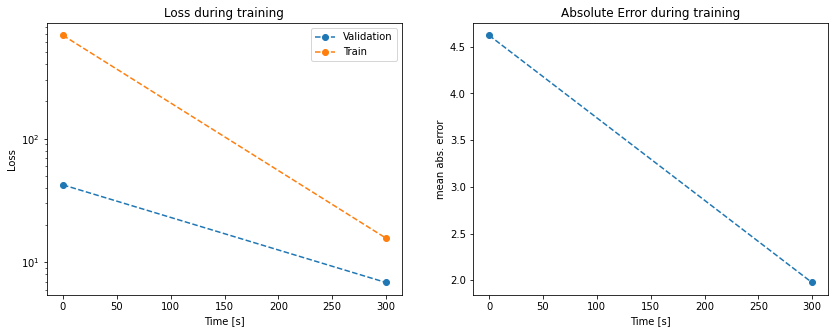

In [37]:
# Results is a matrix with each row corresponding to an epoch.
# Within each row we will have:
# [time, learning_rate, train_loss, val_loss, val_mae]
results = np.loadtxt(os.path.join(hivmod, 'log.csv'), skiprows=1, delimiter=',')

time = results[:,0]-results[0,0]
learning_rate = results[:,1]
train_loss = results[:,2]
val_loss = results[:,3]
val_mae = results[:,4]

print('Final validation MAE:', np.round(val_mae[-1], 3))

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(time, val_loss, '--o', label='Validation')
plt.plot(time, train_loss, '--o', label='Train')
plt.yscale('log')
plt.ylabel('Loss')
plt.xlabel('Time [s]')
plt.legend()
plt.title('Loss during training')

plt.subplot(1,2,2)
plt.plot(time, val_mae, '--o')
plt.ylabel('mean abs. error')
plt.xlabel('Time [s]')
plt.title('Absolute Error during training')
plt.show()

Note that after just two epochs, the absolute error during training is greater than 1? Which I am a bit confused about since HIV_active can only ever be 0 and 1. So does this mean our model is making predicitons outside of this range.?

Using the model:

In [ ]:
#Using the model

#NOTE --- NEED TO CHANGE THIS FROM QM9
best_loader = spk.AtomsLoader(test, batch_size=100)

err = 0
print(len(test_loader))
for count, batch in enumerate(test_loader):
    # move batch to GPU, if necessary
    batch = {k: v.to(device) for k, v in batch.items()}

    # apply model
    pred = best_model(batch)

    # calculate absolute error
    tmp = torch.sum(torch.abs(pred[QM9.U0]-batch[QM9.U0]))
    tmp = tmp.detach().cpu().numpy() # detach from graph & convert to numpy
    err += tmp

    # log progress
    percent = '{:3.2f}'.format(count/len(test_loader)*100)
    print('Progress:', percent+'%'+' '*(5-len(percent)), end="\r")

err /= len(test)
print('Test MAE', np.round(err, 2), 'eV =',
      np.round(err / (kcal/mol), 2), 'kcal/mol')